## Motivación:
En esta sección, nos encargaremos de lo que se denomina *aprendizaje supervisado*, esto se refiere a que tenemos alguna cantidad de muestras y nuestros modelos aprenderán de ellas.
Muchos problemas consisten en tratar de predecir algún valor, dadas ciertas variables.
En el contexto de machine learning nuestra variables se llamaran ***features***, y la variable a predecir es el ***target***, en el caso que el target sea una variable continua, nos encontramos con un problema de regresión.

Imaginemos tenemos datos atmosfericos de un día en la mañana, tales como presión, temperatura, viento, entre otras, y queremos predecir que temperatura habrá en la tarde.
Lo anterior es un claro ejemplo de un problema de regresión, si además tenemos un data-set con temperaturas en la mañana y la tarde de distintos días, podremos hacer un modelo de regresión supervisado.
## Un modelo simple:
El modelo de regresión más sencillo es la predicción por la media, o valor esperado. en general este modelo (pobre) puede ser utilizado para comparar los modelos que entrenaremos más adelante (lo hago mejor que la predicción por el promedio, o similar, o peor?!).
Luego esta el modelo de regresión lineal:

### Regresión lineal:
La idea principal de un modelo de regresión lineal es ajustar una recta (regresión lineal simple)o un hiperplano (regresión lineal multiple) que minimize la norma ($\ell^2$) de los errores (residuos).
matemáticamente queremos:
$$\tilde{y}=a\dot{}x+b$$
donde:
* $a\in \mathbb{R}^n$
* $x\in \mathbb{R}^n$
* $b \in \mathbb{R}$

tal que los coeficientes $a$ y el intercepto $b$ minimicen $$\sum\left(y_i-\tilde{y}_i\right)^2$$ para nuestro conjunto de observaciones, en palabras, buscamos la recta que minimiza el error entre nuestro valor observado y nuestro valor predicho.
El problema anterior tiene solución explicita bajo condiciones relativamente generales, sin embargo, cabe mencionar es posible encontrar soluciones aproximadas usando técnicas de optimización, como el método del gradiente o **Steepest Descent**.

### Métodos más generales:
Existen muchos modelos estadísticos de regresión entre los que cabe mencionar regresion ridge, lasso o elastic-net, del area de machine learning, podemos encontrar modelos como las regresión forest, maquinas de soporte vectorial (también connocidas como maquinas de *vectores vectoriales*) y redes neuronales.

## Hands-on:
Para hacer modelos predictivos en python, la librería scikit-learn, que usaremos a lo largo de todo el curso, provee casi todas las herramientas necesarias, desde el encoding de nuestras *features*, hasta métricas de evaluación, incluyendo los modelos que queremos calibrar.
Por otro lado, las herramientas están hechas de manera estadar, por lo que cambiar el modelo solo significa cambiar una linea de código!

In [1]:
# primero carguemos las librerias para este notebook:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division
% matplotlib inline

In [2]:
### ahora carguemos los datos!
df = pd.read_csv('data_1.csv')
### ahora no nos preocuparemos por la data faltante...
df.dropna(inplace=True)
print(df.columns)
df.head()

Index([u'number', u'air_pressure_9am', u'air_temp_9am',
       u'avg_wind_direction_9am', u'avg_wind_speed_9am',
       u'max_wind_direction_9am', u'max_wind_speed_9am',
       u'rain_accumulation_9am', u'rain_duration_9am',
       u'relative_humidity_9am', u'relative_humidity_3pm'],
      dtype='object')


,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730,92.410000,76.740000


Vamos a tratar de predecir la humedad relativa de la tarde, en base a los datos de la mañana

## Ahora a calibrar los modelos! No tan rápido...

Antes de seguir tenemos que comentar algo, ¿Cómo podemos medir la calidad de un modelo? Ya mencionamos que compararlo con la predicción por la media es posible, pero ¿Cómo sabemos si nuestro modelo será bueno al tratar de predecir un valor que no estaba en nuestro data-set?.
Para esto, existe la técnica del *hold-out set* la cual consiste en separar todo nuestro data set en dos conjuntos:
1. Conjunto de entrenamiento (*training set*):
Acá es donde nuestro modelo se entrena y se ajusta lo mejor posible.
2. Conjunto de evaluación (*testing set*):
Acá es donde medimos que tán buena será la *performance* de nuestro modelo ante nuevas observaciones:
    * Medimos la capacidad de generalizar que tiene nuestro modelo!
    
En general, se reserva un 20% de las muestras para testear, y el otro 80% para entrenar los modelos.

Esto último nos permite saber si estamos sobre ajustando el modelo: El modelo predice nuestras observaciones con muy alta presición, pero no tiene la capacidad de generalizar! 

Las siguientes imágenes nos muestran que es lo que queremos:
<img src='JustRight.png'>
<img src='errors.png'>

In [3]:
#seleccionemos nuestras features
features = df[df.columns[1:-1]].values
target = df[u'relative_humidity_3pm'].values

In [4]:
### do the split!
x=np.random.binomial(1,0.8,len(df))
training_features=features[x==1]
testing_features=features[x==0]
training_target=target[x==1]
testing_target=target[x==0]

In [5]:
### importemos los modelos lineales
from sklearn import linear_model as L_model

In [6]:
L_model?

In [7]:
lineal = L_model.LinearRegression()
lineal.fit(training_features,training_target)
predicted = lineal.predict(testing_features)

In [17]:
print(testing_target[-5:])
print(predicted[-5:])

[ 53.86  34.69  88.16  69.67  52.31]
[ 78.51652981  29.23836126  81.7914489   66.79462827  45.82755166]


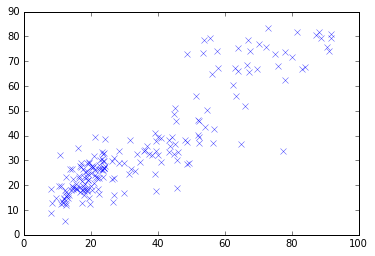

In [18]:
plt.plot(testing_target,predicted,'x',alpha=0.7)
plt.show()

In [15]:
### medida del error RMSE:
np.sqrt(((predicted-testing_target)**2).sum()/len(testing_target))

9.6998480541873224

### Un paso más allá:

